<a href="https://colab.research.google.com/github/mayankpiplodiya/AI-Ml/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df =pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Continuous Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [9]:
mean_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = mean_imputer.fit_transform(df[numerical_columns])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [12]:
print(df.dtypes)


PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
SibSp          float64
                ...   
Cabin_146         bool
Cabin_147         bool
Embarked_1        bool
Embarked_2        bool
Embarked_3        bool
Length: 1728, dtype: object


In [13]:
#Standardization z score scaling
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [14]:
# Normalization using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 1728 entries, PassengerId to Embarked_3
dtypes: bool(1721), float64(7)
memory usage: 1.5 MB


<Axes: xlabel='PassengerId'>

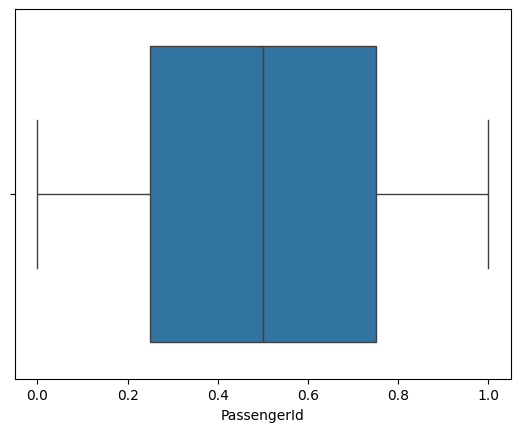

In [16]:
sns.boxplot(x='PassengerId',data=df)

<Axes: xlabel='Survived'>

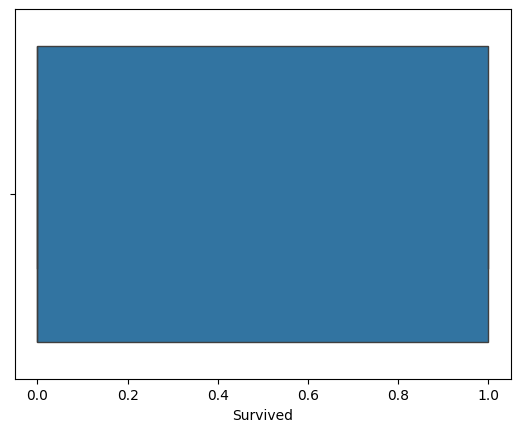

In [17]:
sns.boxplot(x='Survived',data=df)

<Axes: xlabel='Pclass'>

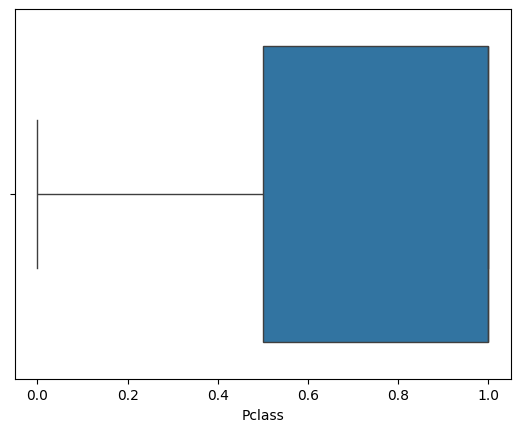

In [18]:
sns.boxplot(x='Pclass',data=df)

<Axes: xlabel='Age'>

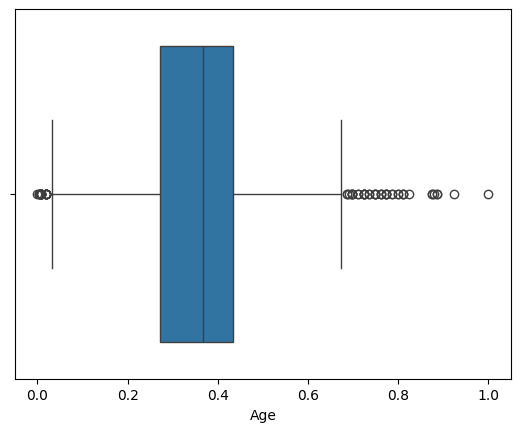

In [19]:
sns.boxplot(x='Age',data=df)

In [20]:
#Outliers removal
print(df['Age'].quantile(0.05))
print(df['Age'].quantile(0.95))

0.07011812013068608
0.6732847449107816


In [21]:
df['Age']=np.where(df['Age']>56.0,56.0,df['Age'])
df['Age']=np.where(df['Age']<4.0,4.0,df['Age'])

<Axes: ylabel='Age'>

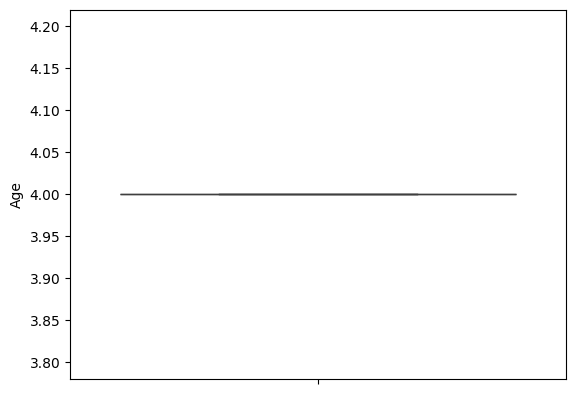

In [22]:
sns.boxplot(df['Age'])

<Axes: xlabel='SibSp'>

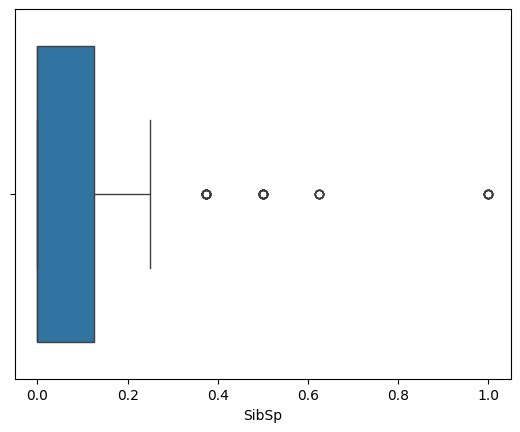

In [23]:
sns.boxplot(x='SibSp',data=df)

In [24]:

print(df['SibSp'].quantile(0.05))
print(df['SibSp'].quantile(0.95))

0.0
0.375


In [25]:
df['SibSp']=np.where(df['SibSp']>3.0,3.0,df['SibSp'])
df['SibSp']=np.where(df['SibSp']<0.0,0.0,df['SibSp'])

<Axes: ylabel='SibSp'>

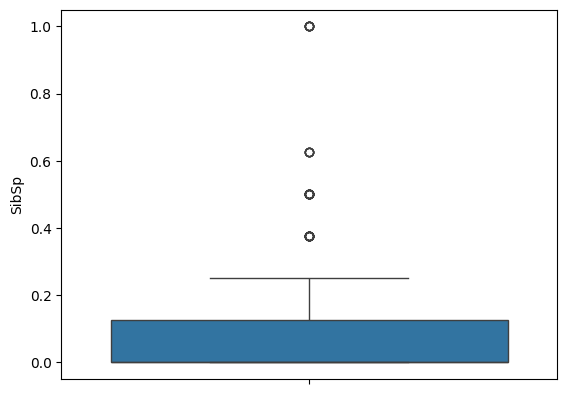

In [26]:
sns.boxplot(df['SibSp'])

<Axes: xlabel='Parch'>

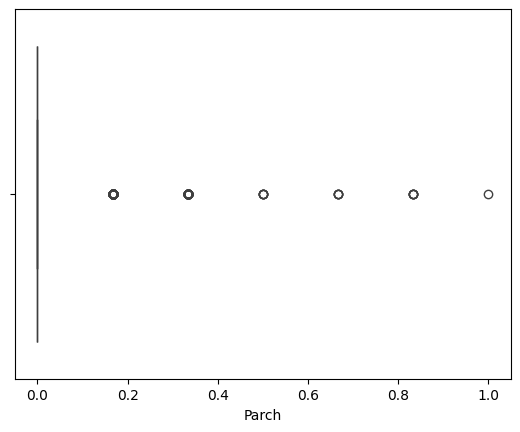

In [27]:
sns.boxplot(x='Parch',data=df)

In [28]:
print(df['Parch'].quantile(0.05))
print(df['Parch'].quantile(0.95))

0.0
0.3333333333333333


In [29]:
df['Parch']=np.where(df['Parch']>2.0,2.0,df['Parch'])
df['Parch']=np.where(df['Parch']<0.0,0.0,df['Parch'])

<Axes: ylabel='Parch'>

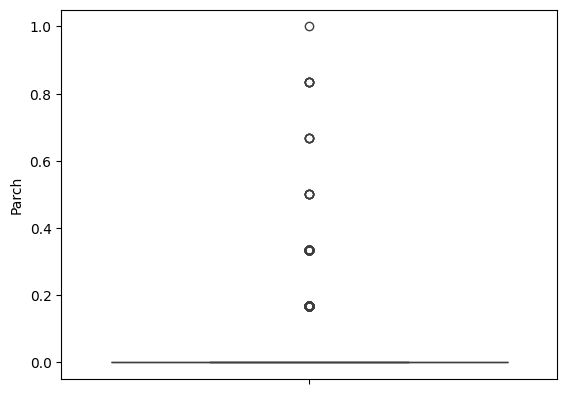

In [30]:
sns.boxplot(df['Parch'])

<Axes: xlabel='Fare'>

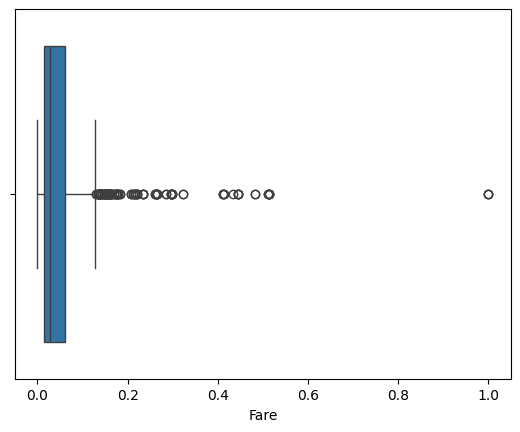

In [31]:
sns.boxplot(x='Fare',data=df)

In [32]:
print(df['Fare'].quantile(0.05))
print(df['Fare'].quantile(0.95))

0.014102260811993547
0.21876393147218626


In [33]:
df['Fare']=np.where(df['Fare']>7.225,7.225,df['Fare'])
df['Fare']=np.where(df['Fare']<112.07915,112.07915,df['Fare'])

<Axes: ylabel='Fare'>

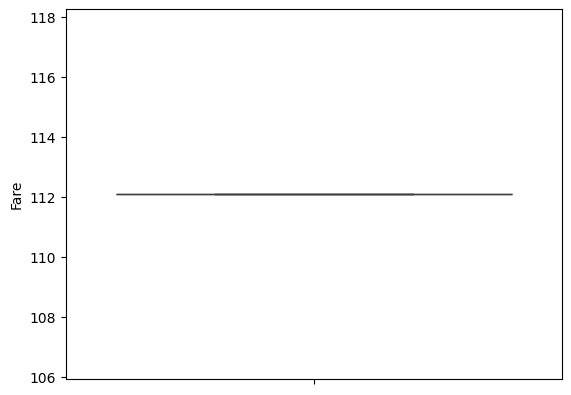

In [34]:
sns.boxplot(df['Fare'])